In [146]:
# This is part of my data science journey with code basics


# References
# https://www.youtube.com/watch?v=rdfbcdP75KI&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=19
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html
# https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups
# https://www.afternerd.com/blog/python-string-contains/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/modules/model_persistence.html

In [2]:
# Connect to my google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [260]:
# import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

import joblib
import json
import pickle

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,10)

In [4]:
# Read the dataset
df_bangalore = pd.read_csv('/content/drive/MyDrive/Bangalore_House_Prices.csv', sep=',', header=0)

# look at the first 10 records
df_bangalore.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [5]:
# Getting the shape of the dataset
df_bangalore.shape

(13320, 9)

In [6]:
# Getting the dimensions
df_bangalore.ndim

2

In [7]:
# Let's get some statistics on the various area_type
df_bangalore.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
# Let's get some statistics on the various availability
df_bangalore.groupby('availability')['availability'].agg(['count'])

,count
availability,
14-Jul,1
14-Nov,1
15-Aug,1
15-Dec,1
15-Jun,1
...,...
22-Mar,3
22-May,10
22-Nov,2


In [9]:
# Let's get some statistics on the various locations
df_bangalore.groupby('location')['location'].agg(['count'])

,count
location,
Anekal,1
Banaswadi,1
Basavangudi,1
Bhoganhalli,1
Devarabeesana Halli,6
...,...
t.c palya,1
tc.palya,4
vinayakanagar,1


In [10]:
# What are the unique locations
df_bangalore['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [11]:
# Check how many total unique locations are there
len(df_bangalore['location'].unique())

1306

In [12]:
# Let's get some statistics on the various sizes
df_bangalore.groupby('size')['size'].agg(['count']).sort_values(by='count', ascending=False)

,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


In [13]:
# Let's get some statistics on the number of baths
df_bangalore.groupby('bath')['bath'].agg(['count']).sort_values(by='count', ascending=False)

,count
bath,
2.0,6908
3.0,3286
4.0,1226
1.0,788
5.0,524
6.0,273
7.0,102
8.0,64
9.0,43


In [14]:
# Let's get some statistics on the number of locations
df_bangalore.groupby('location')['location'].agg(['count']).sort_values(by='count', ascending=False)

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Banaswadi,1
Kanakadasa Layout,1
Kanakapur main road,1


In [15]:
# Dropping some columns which may not be of utmost importance from the dataset
df_bangalore.drop(columns=['area_type', 'availability', 'society', 'balcony'], inplace=True)
df_bangalore

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [16]:
# Revisiting the shape after dropping the 4 columns above
df_bangalore.shape

(13320, 5)

In [17]:
# Performing data cleaning by first looking for null values
df_bangalore.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [18]:
# Above we see a few rows have null values
# Dropping those rows may not have a significant impact on our model's ability to make prediction
# There are overall 13K rows. Dropping 90 records should not be a major concern
df_bangalore.dropna(inplace=True)

# Check for nulls again
df_bangalore.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [19]:
# Above looks good. No nulls.
# Getting the new shape
df_bangalore.shape

(13246, 5)

In [20]:
# Looking at the sample output above, size has values such as 2 BHK, 4 Bedroom, etc.
# Remember the model works best with numeric data
df_bangalore['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
# Create a new column in the bangalore dataset named Bedrooms
df_bangalore['Bedrooms'] = df_bangalore['size'].apply(lambda size: int(size.split(' ')[0]))

# take a look at the new Bedrooms column
df_bangalore

,location,size,total_sqft,bath,price,Bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [22]:
# With the new bedroom columns like find the unique values again
df_bangalore['Bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [23]:
# Awesome, it all numeric now.
# Let's also drop the previous size column
df_bangalore.drop(columns=['size'], inplace=True)

# Showing that the column no longer exists
df_bangalore

,location,total_sqft,bath,price,Bedrooms
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [24]:
# finding all homes with more than 30 bedrooms
df_bangalore[df_bangalore.Bedrooms > 30]

,location,total_sqft,bath,price,Bedrooms
4684,Munnekollal,2400,40.0,660.0,43


In [25]:
# I tried to look into homes which have a total_sqft > 4000 but was getting an error
# it seems while the sample above suggest integers, it may not be so
# Looking at the unique values for total_sqft
df_bangalore['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
# Above, we see a range value '1133 - 1384'. 
# One trick is to take an average of the 2 numbers
# Creating a function to track if a value in the total_sqlft is float
def is_float(total_sqft):
  try:
    float(total_sqft)
  except:
    return False
  else:
    return True

In [27]:
# Testing the function
is_float('10')

True

In [28]:
# Above looks like it works as expected. 
# What happens when we give one of those values witih a range
is_float('10-20')

False

In [29]:
# Ok that seems to have work as expected
# returning fields which have float in the total_sqft column
df_bangalore[df_bangalore['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,Bedrooms
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [30]:
# returning the first 10 fields which DO NOT have float in the total_sqft column
df_bangalore[~df_bangalore['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,Bedrooms
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [31]:
# Above, we now see a number of fields have range values
# At the sametime we see content around sq meter, Perch, etc.
# Remember, in most cases, our model prefers numerical values
# Let modify the is_float function
def is_float(total_sqft):
  if '-' in total_sqft:
    tokens = total_sqft.split('-')
    if ( len(tokens) == 2 ):
      return (float(tokens[0]) + float(tokens[1])) / 2
  try:
    return float(total_sqft)
  except:
    return None

In [32]:
# Test the function again
is_float('2')

2.0

In [33]:
# Test the function again using a range value
is_float('20 -30')

25.0

In [34]:
# Above says the function is working.
# running it against the df_bangalor[total_sqft]
df_bangalore['total_sqft'] = df_bangalore['total_sqft'].apply(is_float)

In [35]:
# looking at the first 10 records again
df_bangalore.head(10)

,location,total_sqft,bath,price,Bedrooms
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [36]:
# Revisiting record 410 we see there are still rows within the total_sqft which are not numbers
df_bangalore.loc[410]

location      Kengeri
total_sqft        NaN
bath                1
price            18.5
Bedrooms            1
Name: 410, dtype: object

In [37]:
# Looking further, we see total sq ft as 46 rows which are not numbers
df_bangalore.isna().sum()

location       0
total_sqft    46
bath           0
price          0
Bedrooms       0
dtype: int64

In [38]:
# dropping those fields which are not nnumbers
df_bangalore.dropna(axis=0, inplace=True)

In [39]:
# Testing again to ensure those rows have been dropped
df_bangalore.isna().sum()

location      0
total_sqft    0
bath          0
price         0
Bedrooms      0
dtype: int64

In [40]:
# Calculating the price for square foot
# and storing it in a different column
df_bangalore['price_per_sq_ft'] = df_bangalore['price'] * 10000 / df_bangalore['total_sqft']

# Verify the new column
df_bangalore.head(10)

,location,total_sqft,bath,price,Bedrooms,price_per_sq_ft
0,Electronic City Phase II,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,624.589086
4,Kothanur,1200.0,2.0,51.00,2,425.000000
5,Whitefield,1170.0,2.0,38.00,2,324.786325
6,Old Airport Road,2732.0,4.0,204.00,4,746.705710
7,Rajaji Nagar,3300.0,4.0,600.00,4,1818.181818
8,Marathahalli,1310.0,3.0,63.25,3,482.824427
9,Gandhi Bazar,1020.0,6.0,370.00,6,3627.450980


In [41]:
# Previously we learned there were over 1300 locations
# Remembering our model prefers numerical values, we can one-hot-encode the 
# location column. However, because there are over 1300 locations, it is
# more than likely one hot encoding will result in an additional 1300 features
# This large number of features can result in the dimensionality curse
# One way to address this. Find all columns where locations is less than a 
# a threshold and all all those to a separate column

# remove any white space before and after the locations
df_bangalore['location'] = df_bangalore['location'].apply(lambda clear_white_space: clear_white_space.strip())

In [42]:
# Find all locations with less than 10 entries
len(df_bangalore.groupby('location')['location'].agg('count') < 10)

1287

In [43]:
# Assign the returned values to a variable
location_stats = df_bangalore.groupby('location')['location'].agg('count').sort_values(ascending=False)

# print the results
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [44]:
# Finding the total locations with 10 or less data points
location_stats[location_stats <= 10]

location
Dodsworth Layout        10
BTM 1st Stage           10
Sadashiva Nagar         10
Thyagaraja Nagar        10
Kalkere                 10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [45]:
# Find the total number of locations with 10 or less data points
len(location_stats[location_stats <= 10])

1047

In [47]:
# Replace the locations with less than 10 records to 'Other_Location'
df_bangalore['location'] = df_bangalore['location'].apply(lambda other_location: 'Other_Location' if other_location in location_stats[location_stats <= 10] else other_location)

# print a snapshot of the updated dataset
df_bangalore

,location,total_sqft,bath,price,Bedrooms,price_per_sq_ft
0,Electronic City Phase II,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,624.589086
4,Kothanur,1200.0,2.0,51.00,2,425.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,668.983493
13316,Other_Location,3600.0,5.0,400.00,4,1111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,525.854514
13318,Padmanabhanagar,4689.0,4.0,488.00,4,1040.733632


In [48]:
# Taking a look at the locations again
df_bangalore['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'Other_Location',
       '7th Phase JP Nagar', 'Gottigere', 'Sarjapur', 'Mysore Road',
       'Bisuvanahalli', 'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete',
       'Thanisandra', 'Bellandur', 'Electronic City', 'Ramagondanahalli',
       'Yelahanka', 'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarja

In [49]:
# What is the total number of locations now?
len(df_bangalore['location'].unique())

241

In [50]:
# Impressive. previously we had over 1200 locations which had less than 10 datapoints
# Now overall we have only 241 locations. 

# Next up, dealing with outlier detection
# Looking at the dataset again
df_bangalore.head(10)

,location,total_sqft,bath,price,Bedrooms,price_per_sq_ft
0,Electronic City Phase II,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,624.589086
4,Kothanur,1200.0,2.0,51.00,2,425.000000
5,Whitefield,1170.0,2.0,38.00,2,324.786325
6,Old Airport Road,2732.0,4.0,204.00,4,746.705710
7,Rajaji Nagar,3300.0,4.0,600.00,4,1818.181818
8,Marathahalli,1310.0,3.0,63.25,3,482.824427
9,Other_Location,1020.0,6.0,370.00,6,3627.450980


In [51]:
# How many records do we have now.
df_bangalore.shape

(13200, 6)

In [52]:
# Let's find those records where their seems to be abnormality in the size vs number of rooms
df_bangalore[(df_bangalore['total_sqft']/df_bangalore['Bedrooms']) < 300].head(10)

,location,total_sqft,bath,price,Bedrooms,price_per_sq_ft
9,Other_Location,1020.0,6.0,370.0,6,3627.450980
45,HSR Layout,600.0,9.0,200.0,8,3333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,1066.098081
68,Devarachikkanahalli,1350.0,7.0,85.0,8,629.629630
70,Other_Location,500.0,3.0,100.0,3,2000.000000
78,Kaval Byrasandra,460.0,1.0,22.0,2,478.260870
89,Rajaji Nagar,710.0,6.0,160.0,6,2253.521127
119,Hennur Road,276.0,3.0,23.0,2,833.333333
129,Vishwapriya Layout,950.0,7.0,115.0,7,1210.526316
149,Other_Location,1034.0,5.0,185.0,6,1789.168279


In [53]:
# Let's remove those records above. as it would be challenging to se a house 
# with 1020 total sqft with 6 baths and 6 bedrooms. Not impossible but improbable
# To remove these records from our dataset, use the '~' character
df_bangalore = df_bangalore[~(df_bangalore['total_sqft']/df_bangalore['Bedrooms'] < 300)]

# Print the entries again
df_bangalore.head(10)

,location,total_sqft,bath,price,Bedrooms,price_per_sq_ft
0,Electronic City Phase II,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,624.589086
4,Kothanur,1200.0,2.0,51.00,2,425.000000
5,Whitefield,1170.0,2.0,38.00,2,324.786325
6,Old Airport Road,2732.0,4.0,204.00,4,746.705710
7,Rajaji Nagar,3300.0,4.0,600.00,4,1818.181818
8,Marathahalli,1310.0,3.0,63.25,3,482.824427
10,Whitefield,1800.0,2.0,70.00,3,388.888889


In [54]:
# Get the shape again
df_bangalore.shape

(12456, 6)

In [55]:
# Looks like we removed about 744 records with our last action
# learning a little more about the various features, starting with price per sqft
df_bangalore['price_per_sq_ft'].describe()

count    12456.000000
mean       630.850283
std        416.812734
min         26.782981
25%        421.052632
50%        529.411765
75%        691.666667
max      17647.058824
Name: price_per_sq_ft, dtype: float64

In [56]:
# Quite a disparity between the min and max cost
# What about describing the rooms
df_bangalore['Bedrooms'].describe()

count    12456.000000
mean         2.649004
std          0.976046
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         16.000000
Name: Bedrooms, dtype: float64

In [57]:
# Describing the total sqft
df_bangalore['total_sqft'].describe()

count    12456.000000
mean      1590.189927
std       1260.404795
min        300.000000
25%       1115.000000
50%       1300.000000
75%       1700.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [58]:
# Let's create a copy of the df_bangalore dataframe
df_bangalore_copy = df_bangalore.copy(deep=True)

In [59]:
# taking a snapshot of the new dataframe
df_bangalore_copy

,location,total_sqft,bath,price,Bedrooms,price_per_sq_ft
0,Electronic City Phase II,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,624.589086
4,Kothanur,1200.0,2.0,51.00,2,425.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,668.983493
13316,Other_Location,3600.0,5.0,400.00,4,1111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,525.854514
13318,Padmanabhanagar,4689.0,4.0,488.00,4,1040.733632


In [60]:
# Create a new function to remove records where the location is beyond 1 standard deviation
def remove_outliers(input_dataframe):
  df_modified = pd.DataFrame()

  # First modified the Price Per Sq Ft
  for key, sub_dataframe in input_dataframe.groupby(['location']):
    #print(key, sub_dataframe)
    pps_mean = np.mean(sub_dataframe['price_per_sq_ft'])
    pps_std = np.std(sub_dataframe['price_per_sq_ft'])
    #print(df_location_mean, df_location_std)
    reduced_df = sub_dataframe[(sub_dataframe['price_per_sq_ft'] > (pps_mean - pps_std)) & (sub_dataframe['price_per_sq_ft'] <= (pps_mean + pps_std))]
    df_modified = pd.concat([df_modified, reduced_df], ignore_index=True)

  return df_modified

In [61]:
# With the above done, let's create a new dataframe
df_bangalore_modified_mean_std = remove_outliers(df_bangalore_copy)

In [62]:
# Print the first few records
df_bangalore_modified_mean_std.sample(10)

,location,total_sqft,bath,price,Bedrooms,price_per_sq_ft
2852,Hebbal,1636.0,3.0,119.00,3,727.383863
6503,Other_Location,1500.0,2.0,130.00,2,866.666667
9415,Vijayanagar,2100.0,6.0,252.00,4,1200.000000
4784,Laggere,2800.0,5.0,125.00,5,446.428571
8526,Sarjapur Road,1577.0,3.0,65.00,3,412.175016
5769,Other_Location,1200.0,2.0,49.50,2,412.500000
3113,Hennur Road,1445.0,2.0,86.69,3,599.930796
8646,Sarjapura - Attibele Road,829.0,2.0,22.80,2,275.030157
1734,Devanahalli,1010.0,2.0,51.00,2,504.950495
6888,Other_Location,1200.0,2.0,75.00,2,625.000000


In [63]:
# Get a list of total records
df_bangalore_modified_mean_std.shape

(10242, 6)

In [64]:
# Once again, describe the total sqft
df_bangalore_modified_mean_std['total_sqft'].describe()

count    10242.000000
mean      1504.023111
std        876.798065
min        300.000000
25%       1108.000000
50%       1282.000000
75%       1650.000000
max      30400.000000
Name: total_sqft, dtype: float64

In [65]:
# Once again, describe the price_per_sq_ft
df_bangalore_modified_mean_std['price_per_sq_ft'].describe()

count    10242.000000
mean       565.773599
std        226.636884
min        125.000000
25%        424.479671
50%        517.284678
75%        642.600059
max       2450.980392
Name: price_per_sq_ft, dtype: float64

In [66]:
# Once again, describe the price_per_sq_ft
df_bangalore_modified_mean_std['Bedrooms'].describe()

count    10242.000000
mean         2.572642
std          0.897242
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: Bedrooms, dtype: float64

In [67]:
# Comparing the data between 2 and 3 bedrooms
def plot_bedrooms(dataframe,location):
  df_2_bedroom = dataframe[(dataframe.location == location) & (dataframe.Bedrooms==2)]
  df_3_bedroom = dataframe[(dataframe.location == location) & (dataframe.Bedrooms==3)]

  plt.xlabel('Square Foot')
  plt.ylabel('Price')
  plt.title('Price comparrison 2 v 3 bedrooms in: ' + location)
  plt.scatter(df_2_bedroom.total_sqft, df_2_bedroom.price, label='2 Bedrooms', s=50)
  plt.scatter(df_3_bedroom.total_sqft, df_3_bedroom.price, label='3 Bedrooms', s=50, marker='+', color='red')
  plt.legend()


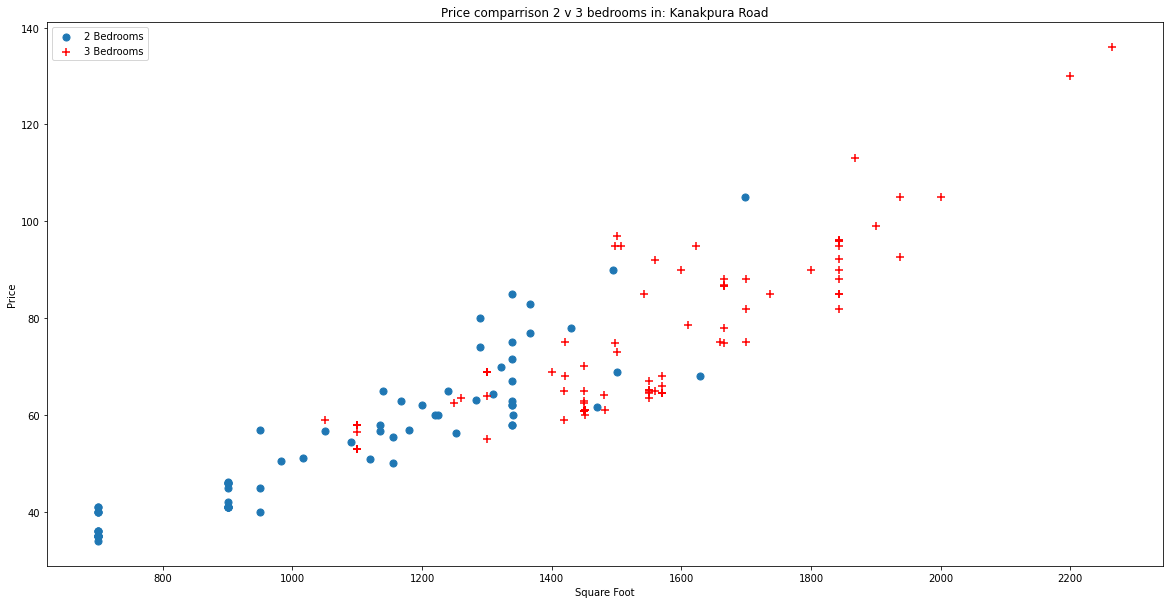

In [68]:
plot_bedrooms(df_bangalore_modified_mean_std,'Kanakpura Road')


In [69]:
# With above there are situations in which the 3 bedrooms houses are less than 
# the cost of 2 bedroom houses with similar square feet
# Removing those anomalies
def remove_bedoom_outliers(input_dataframe):
  exclude_indicies = np.array([[]])
  for location, location_df in input_dataframe.groupby(['location']):
    #print(location, location_df)
    bedroom_stats = {}
    for bedroom, bedroom_df in location_df.groupby('Bedrooms'):
      bedroom_stats[bedroom] = {
          'mean': np.mean(bedroom_df.price_per_sq_ft),
          'std': np.std(bedroom_df.price_per_sq_ft),
          'count': bedroom_df.shape[0]
      }

    for bedroom, bedroom_df in location_df.groupby('Bedrooms'):
      stats = bedroom_stats.get(bedroom-1)
      if stats and stats['count'] > 5:
        exclude_indicies = np.append(exclude_indicies, bedroom_df[bedroom_df.price_per_sq_ft < (stats['mean'])].index.values)
  
  #print(bedroom_stats)
  #print(exclude_indicies
  return input_dataframe.drop(exclude_indicies, axis='index')

In [70]:
# Updating the dataframe
df_bangalore_modified_mean_std = remove_bedoom_outliers(df_bangalore_modified_mean_std)

In [71]:
# Getting the new shape
df_bangalore_modified_mean_std.shape

(7317, 6)

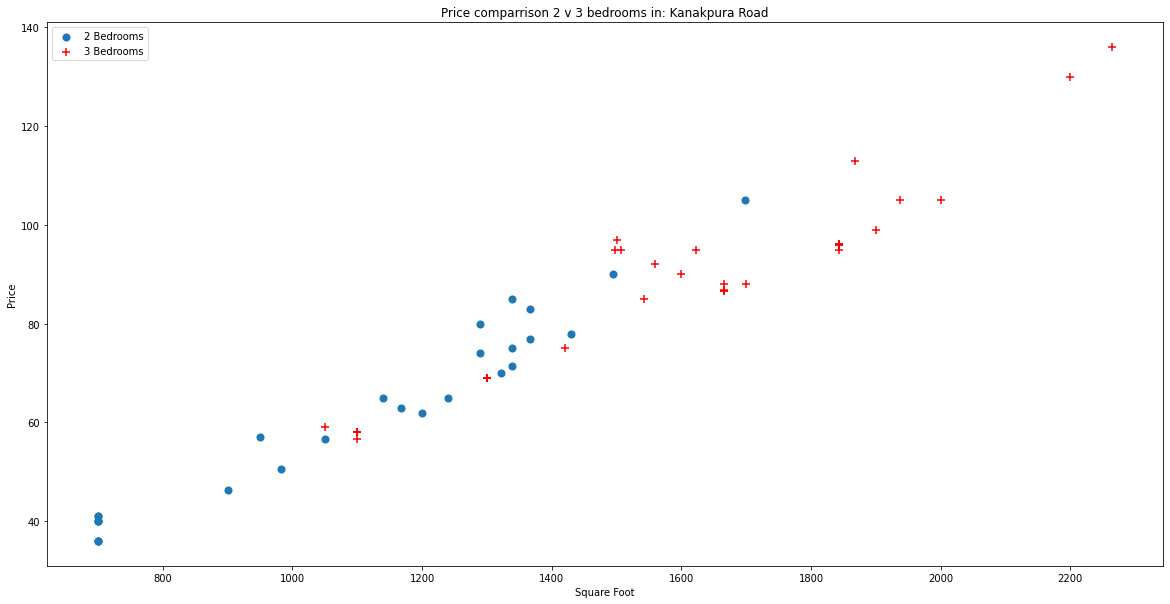

In [72]:
# Now down to 7K records
# Run the scatter plot again
plot_bedrooms(df_bangalore_modified_mean_std,'Kanakpura Road')

(array([ 548., 3580., 2299.,  457.,  253.,  115.,   39.,   16.,    5.,
           5.]),
 array([ 130.        ,  362.09803922,  594.19607843,  826.29411765,
        1058.39215686, 1290.49019608, 1522.58823529, 1754.68627451,
        1986.78431373, 2218.88235294, 2450.98039216]),
 <a list of 10 Patch objects>)

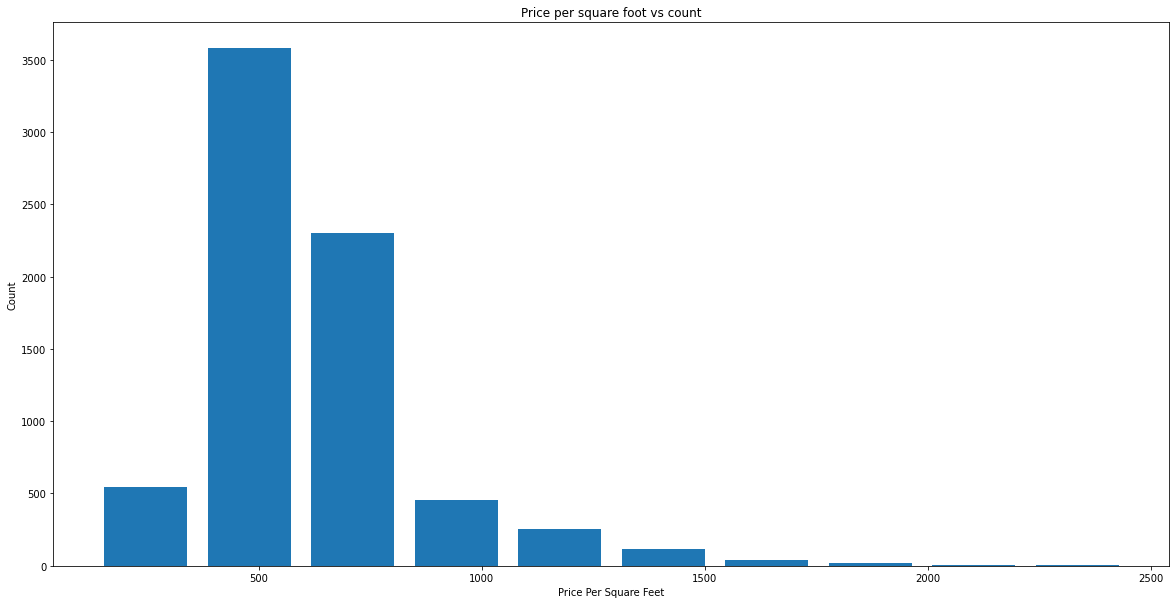

In [73]:
# Above looks a lot tidier
# plot a histogram to see properties by per square foot area
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.title('Price per square foot vs count')
plt.hist(df_bangalore_modified_mean_std['price_per_sq_ft'], rwidth=0.8)

(array([4.756e+03, 1.763e+03, 6.760e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

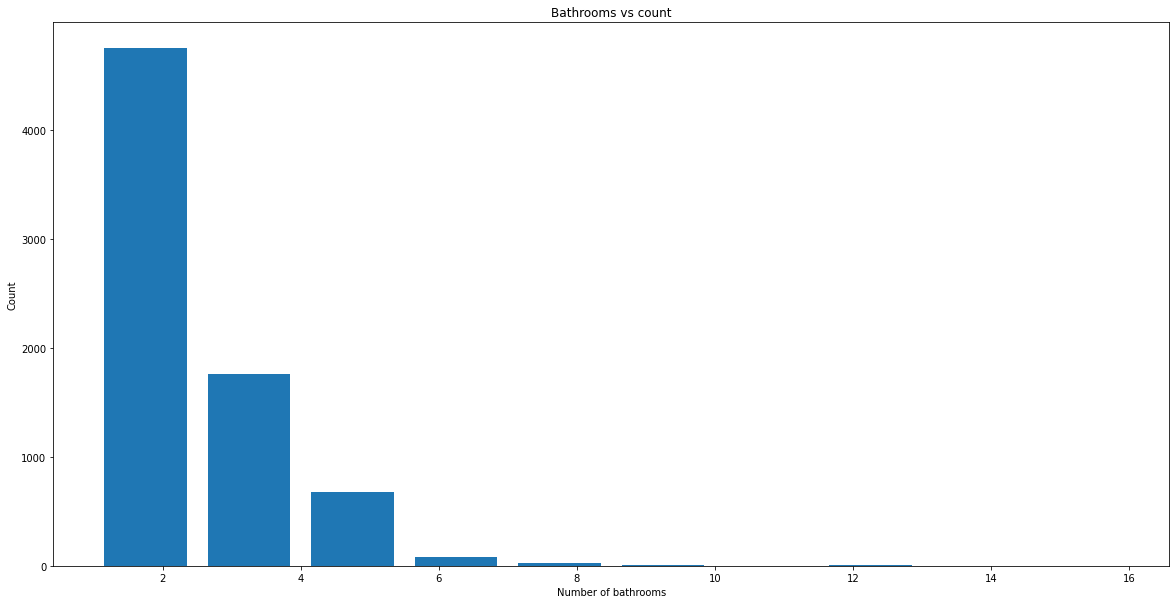

In [74]:
# Plt a histogram of the bathrooms
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')
plt.title('Bathrooms vs count')
plt.hist(df_bangalore_modified_mean_std['bath'], rwidth=0.8)

In [75]:
# Identify the outliers where a home has more bathrooms than bedrooms
df_bangalore_modified_mean_std[df_bangalore_modified_mean_std['bath'] > df_bangalore_modified_mean_std['Bedrooms'] + 2 ]

,location,total_sqft,bath,price,Bedrooms,price_per_sq_ft
1626,Chikkabanavar,2460.0,7.0,80.0,4,325.203252
5238,Nagasandra,7000.0,8.0,450.0,4,642.857143
5851,Other_Location,11338.0,9.0,1000.0,6,881.989769
9017,Thanisandra,1806.0,6.0,116.0,3,642.303433


In [76]:
# Above we see a few houses where the nuber of bathrooms are more than 
# the number of bedrooms
# Doing the inverse of above
df_bangalore_modified_mean_std[df_bangalore_modified_mean_std['bath'] < df_bangalore_modified_mean_std['Bedrooms'] + 2 ]


,location,total_sqft,bath,price,Bedrooms,price_per_sq_ft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1501.754386
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1190.184049
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1253.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1083.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1198.380567
...,...,...,...,...,...,...
10231,Yeshwanthpur,1195.0,2.0,100.0,2,836.820084
10232,Yeshwanthpur,1692.0,3.0,108.0,3,638.297872
10234,Yeshwanthpur,2500.0,5.0,185.0,6,740.000000
10239,Yeshwanthpur,1855.0,3.0,135.0,3,727.762803


In [77]:
# Updating the dataframe with those properties where the number of bedrooms are
# equal to or greater than the number of baths
# running the same command as above but note the sign changed from > to <
df_bangalore_modified_mean_std = df_bangalore_modified_mean_std[df_bangalore_modified_mean_std['bath'] < df_bangalore_modified_mean_std['Bedrooms'] + 2 ]

In [78]:
# Getting the shape of the new dataframe
df_bangalore_modified_mean_std.shape

(7239, 6)

In [79]:
# Preparing to send the data to the machine learning model
# dropping the price_persq_ft column as that was only used for learning about the data
df_bangalore_modified_mean_std.drop(columns=['price_per_sq_ft'], inplace=True)

In [80]:
# Get the new shape of the dataset
df_bangalore_modified_mean_std.shape

(7239, 5)

In [81]:
# With the shape confirmed, peaking into the data
df_bangalore_modified_mean_std.sample(10)

,location,total_sqft,bath,price,Bedrooms
1117,Bellandur,1550.0,2.0,59.0,2
1854,Domlur,780.0,1.0,70.0,1
2552,HSR Layout,1372.0,2.0,68.0,2
9582,Whitefield,1697.0,3.0,115.0,3
5504,Other_Location,2160.0,5.0,250.0,6
8483,Sarjapur Road,1229.0,2.0,70.0,2
2994,Hennur,1041.0,2.0,40.6,2
1126,Bellandur,1325.0,2.0,65.0,2
9436,Vittasandra,1246.0,2.0,64.5,2
5138,Murugeshpalya,1845.0,3.0,91.0,3


In [82]:
# Above we see one column has been dropped.
# Creating a new 'final' copy of the dataset to use with my model
df_bangalore_final = df_bangalore_modified_mean_std.copy(deep=True)

# Saving the cleaned data to a new csv file
df_bangalore_modified_mean_std.to_csv('/content/drive/MyDrive/Bangalore_House_Prices_cleaned.csv', index=False)

In [83]:
# My Gosh, when they said about 80% or more of your time will be spent
# on dealing with data rather than preparing your model
# They were not lying

# viewing the first 10 records of the final dataset
df_bangalore_final.head(10)


,location,total_sqft,bath,price,Bedrooms
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


In [84]:
# first up, the categorical field 'location' above need to be changed to a numeric value
# Taking advantage of one-hot encoding
df_bangalore_final = pd.get_dummies(df_bangalore_final)

In [85]:

# Confirming the new shape
df_bangalore_final.shape

(7239, 245)

In [86]:
# With the shape now extended to 245 columns, taking a look at the sample data
df_bangalore_final.head(10)

,total_sqft,bath,price,Bedrooms,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,location_AECS Layout,location_Abbigere,location_Akshaya Nagar,location_Ambalipura,location_Ambedkar Nagar,location_Amruthahalli,location_Anandapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Ardendale,location_Arekere,location_Attibele,location_BEML Layout,location_BTM 2nd Stage,location_BTM Layout,location_Babusapalaya,location_Badavala Nagar,location_Balagere,location_Banashankari,location_Banashankari Stage II,location_Banashankari Stage III,location_Banashankari Stage V,location_Banashankari Stage VI,location_Banaswadi,location_Banjara Layout,...,location_Sahakara Nagar,location_Sanjay nagar,location_Sarakki Nagar,location_Sarjapur,location_Sarjapur Road,location_Sarjapura - Attibele Road,location_Sector 2 HSR Layout,location_Sector 7 HSR Layout,location_Seegehalli,location_Shampura,location_Shivaji Nagar,location_Singasandra,location_Somasundara Palya,location_Sompura,location_Sonnenahalli,location_Subramanyapura,location_Sultan Palaya,location_TC Palaya,location_Talaghattapura,location_Thanisandra,location_Thigalarapalya,location_Thubarahalli,location_Tindlu,location_Tumkur Road,location_Ulsoor,location_Uttarahalli,location_Varthur,location_Varthur Road,location_Vasanthapura,location_Vidyaranyapura,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,167.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,85.0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,210.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
# Above, we now see the names have become columns
# Considering the dummy variable trap, I will drop the location_Abbigere column
df_bangalore_final.drop(columns=['location_Abbigere'], inplace=True)

In [88]:
# Sampling the data again
df_bangalore_final

,total_sqft,bath,price,Bedrooms,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,location_AECS Layout,location_Akshaya Nagar,location_Ambalipura,location_Ambedkar Nagar,location_Amruthahalli,location_Anandapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Ardendale,location_Arekere,location_Attibele,location_BEML Layout,location_BTM 2nd Stage,location_BTM Layout,location_Babusapalaya,location_Badavala Nagar,location_Balagere,location_Banashankari,location_Banashankari Stage II,location_Banashankari Stage III,location_Banashankari Stage V,location_Banashankari Stage VI,location_Banaswadi,location_Banjara Layout,location_Bannerghatta,...,location_Sahakara Nagar,location_Sanjay nagar,location_Sarakki Nagar,location_Sarjapur,location_Sarjapur Road,location_Sarjapura - Attibele Road,location_Sector 2 HSR Layout,location_Sector 7 HSR Layout,location_Seegehalli,location_Shampura,location_Shivaji Nagar,location_Singasandra,location_Somasundara Palya,location_Sompura,location_Sonnenahalli,location_Subramanyapura,location_Sultan Palaya,location_TC Palaya,location_Talaghattapura,location_Thanisandra,location_Thigalarapalya,location_Thubarahalli,location_Tindlu,location_Tumkur Road,location_Ulsoor,location_Uttarahalli,location_Varthur,location_Varthur Road,location_Vasanthapura,location_Vidyaranyapura,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,1195.0,2.0,100.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10232,1692.0,3.0,108.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10234,2500.0,5.0,185.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10239,1855.0,3.0,135.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [89]:
# Get the new shape
df_bangalore_final.shape

(7239, 244)

In [182]:
# Further confirming the columns
df_bangalore_final.columns

Index(['total_sqft', 'bath', 'price', 'Bedrooms',
       'location_1st Block Jayanagar', 'location_1st Phase JP Nagar',
       'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi',
       'location_5th Block Hbr Layout', 'location_5th Phase JP Nagar',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=244)

In [90]:
# Good stuff. Now we see we have 244 columns above, rather than the previously report 245
# Preparing the independent variables. Everything other than the price column
X_independent_var = df_bangalore_final.drop(columns=['price'])

# print the shape of X_independent_var
X_independent_var.shape

(7239, 243)

In [91]:
# Get a sample of the data to ensure the Prices Var is not there
X_independent_var.head(10)

,total_sqft,bath,Bedrooms,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,location_AECS Layout,location_Akshaya Nagar,location_Ambalipura,location_Ambedkar Nagar,location_Amruthahalli,location_Anandapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Ardendale,location_Arekere,location_Attibele,location_BEML Layout,location_BTM 2nd Stage,location_BTM Layout,location_Babusapalaya,location_Badavala Nagar,location_Balagere,location_Banashankari,location_Banashankari Stage II,location_Banashankari Stage III,location_Banashankari Stage V,location_Banashankari Stage VI,location_Banaswadi,location_Banjara Layout,location_Bannerghatta,location_Bannerghatta Road,...,location_Sahakara Nagar,location_Sanjay nagar,location_Sarakki Nagar,location_Sarjapur,location_Sarjapur Road,location_Sarjapura - Attibele Road,location_Sector 2 HSR Layout,location_Sector 7 HSR Layout,location_Seegehalli,location_Shampura,location_Shivaji Nagar,location_Singasandra,location_Somasundara Palya,location_Sompura,location_Sonnenahalli,location_Subramanyapura,location_Sultan Palaya,location_TC Palaya,location_Talaghattapura,location_Thanisandra,location_Thigalarapalya,location_Thubarahalli,location_Tindlu,location_Tumkur Road,location_Ulsoor,location_Uttarahalli,location_Varthur,location_Varthur Road,location_Vasanthapura,location_Vidyaranyapura,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
# Above looks good
# Get the dependent variable price in y
y_dependent_var = df_bangalore_final['price']

# Get the shape of the y_dependent_var
y_dependent_var.shape

(7239,)

In [93]:
# Get a sample of the dependent var
y_dependent_var.head(10)

0     428.0
1     194.0
2     235.0
3     130.0
4     148.0
5     413.0
6     368.0
8     167.0
9      85.0
10    210.0
Name: price, dtype: float64

In [95]:
# So far so good
# Creating the train and test set
X_train, X_test, y_train, y_test = train_test_split(X_independent_var, y_dependent_var, test_size=0.2, train_size=0.8, random_state=10)


In [103]:
# Setup a linear regression model
lr_model_bangalore = LinearRegression()
lr_model_bangalore

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
# Train the model on the training data
lr_model_bangalore.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
# Get the score of the model
lr_model_bangalore.score(X_test, y_test)

0.8697077447864603

In [110]:
# 86% score is not bad.
# Can it be made better
# Trying KFold cross validation
cv_bangalore = ShuffleSplit(n_splits=5, test_size=0.2, train_size=0.8, random_state=0)
cv_bangalore

ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=0.8)

In [114]:
# Getting the Cross Validation Score
cross_val_score(LinearRegression(), X_independent_var, y_dependent_var, cv=cv_bangalore)

array([0.85828778, 0.84336113, 0.79796392, 0.83935442, 0.87210932])

In [180]:
# Above, it shows about 80% and above
# Looking into GridSearchCV using different classifiers

def find_best_model_using_gridsearchcv(X_data, y_label):
  algorithms = {
      'linear_regression' : {
          'model' : LinearRegression(),
          'params' : {
              'normalize': [True, False]
          }
      },
      'lasso' : {
          'model' : Lasso(),
          'params' : {
              'alpha' : [1,2],
              'selection':['random', 'cyclic']
          }
      },
      'decision_tree': {
          'model' : DecisionTreeRegressor(),
          'params' : {
              'criterion' : ['mse', 'friedman_mse'],
              'splitter':['best', 'random']
          }
      }
  }

  model_scores = []
  cv_bangalore = ShuffleSplit(n_splits=5, test_size=0.2, train_size=0.8, random_state=0)

  for algorithm, config in algorithms.items():
    #print(algorithm)
    #print(config)
    #print(algorithms, config)
    grid_search = GridSearchCV(config['model'], config['params'], cv=cv_bangalore, return_train_score=False)
    grid_search.fit(X_data, y_label)
    model_scores.append({'model' : algorithm,
                         'best_score' : grid_search.best_score_,
                         'best_params' : grid_search.best_params_
                         
    
    
    })

  # Create a new dataframe based on the returend results
  return pd.DataFrame(model_scores, columns=['model', 'best_score', 'best_params'])

In [181]:
print(find_best_model_using_gridsearchcv(X_independent_var, y_dependent_var))

               model  best_score                                 best_params
0  linear_regression    0.842215                         {'normalize': True}
1              lasso    0.722475         {'alpha': 1, 'selection': 'random'}
2      decision_tree    0.784688  {'criterion': 'mse', 'splitter': 'random'}


In [201]:
X_independent_var.columns

Index(['total_sqft', 'bath', 'Bedrooms', 'location_1st Block Jayanagar',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout',
       'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=243)

In [251]:
np.where(X_independent_var.columns == 'location_6th Phase JP Nagar')

(array([9]),)

In [254]:
# Making a prediction with a custom function
def price_predictor(location, total_sqft, bath, bedrooms):
  location_index = np.where(X_independent_var.columns == location)[0][0]
  print('Location Index is: {}'.format(location_index))

  # Create an array of all zeros, to the length of X_independent_var
  x = np.zeros(len(X_independent_var.columns))
  #print(x)

  # assign total square feet to x 0
  x[0] = total_sqft
  
  # assign x 1 to number of baths
  x[1] = bath

  # assign # x2 to number of bedrooms
  x[2] = bedrooms
  
  if location_index >= 0:
    x[location_index] = 1

  print(x)
  return lr_model_bangalore.predict([x])[0]

In [255]:
price_predictor('location_6th Phase JP Nagar',1000,2,3)

Location Index is: 9
[1000.    2.    3.    0.    0.    0.    0.    0.    0.    1.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.

61.35850821255633

In [258]:
# Export the model to a pickel file
with open('/content/drive/MyDrive/lr_model_bangalore_housing.pkl', 'wb') as pickleFile:
  pickle.dump(lr_model_bangalore, pickleFile)

In [259]:
# Just learning about other mechanisms
# Export the model using joblib
joblib.dump( lr_model_bangalore, '/content/drive/MyDrive/lr_model_bangalore_housing.joblib')

['/content/drive/MyDrive/lr_model_bangalore_housing.joblib']

In [262]:
# Exporting the columns as they are not stored as part of the model
data_columns = {
    'data_columns' : [column.lower() for column in X_independent_var.columns ]
}

data_columns

{'data_columns': ['total_sqft',
  'bath',
  'bedrooms',
  'location_1st block jayanagar',
  'location_1st phase jp nagar',
  'location_2nd phase judicial layout',
  'location_2nd stage nagarbhavi',
  'location_5th block hbr layout',
  'location_5th phase jp nagar',
  'location_6th phase jp nagar',
  'location_7th phase jp nagar',
  'location_8th phase jp nagar',
  'location_9th phase jp nagar',
  'location_aecs layout',
  'location_akshaya nagar',
  'location_ambalipura',
  'location_ambedkar nagar',
  'location_amruthahalli',
  'location_anandapura',
  'location_ananth nagar',
  'location_anekal',
  'location_anjanapura',
  'location_ardendale',
  'location_arekere',
  'location_attibele',
  'location_beml layout',
  'location_btm 2nd stage',
  'location_btm layout',
  'location_babusapalaya',
  'location_badavala nagar',
  'location_balagere',
  'location_banashankari',
  'location_banashankari stage ii',
  'location_banashankari stage iii',
  'location_banashankari stage v',
  'loca

In [264]:
# Writing the columns out to a file
with open('/content/drive/MyDrive/bangalore_house_prices_columns.json', 'w') as jsonFile:
  jsonFile.write(json.dumps(data_columns))